<a href="https://colab.research.google.com/github/tadiwamark/pdM_Genset_Analytics/blob/main/pdM_Genset_Analytics_v1_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintanance in IIoT

Using historical data to predict future failure in FG Wilson generators

# Dataset Desscription

The dataset from the "Processed MegaPak Genset Test results 07-03-2021" contains detailed measurements from tests conducted on a generator set (genset). Below is a description of the dataset, highlighting each feature:

1. **Time:** Timestamps indicating when each measurement was taken.

2. **AverageCurrent (A):** The average current in amperes, representing the electrical load on the genset.

3. **Phase1Current (A), Phase2Current (A), Phase3Current (A):** These columns provide current measurements for three separate phases of the electrical supply, indicating how the load is distributed across these phases.

4. **ExhaustTemp (°C):** The temperature of the exhaust in degrees Celsius, a critical parameter for monitoring the engine's thermal performance.

5. **InLetPressure (KPa) and OutLetPressure (KPa):** These columns measure the pressure at the inlet and outlet in kilopascals, which can be important for understanding the air or fluid flow dynamics in the system.

6. **OutLetAirTemp (°C):** Temperature at the outlet, measured in degrees Celsius.

7. **CoolantTemp (°C):** The temperature of the cooling agent (likely water or a special coolant) in degrees Celsius. This is vital for ensuring the genset does not overheat.

9. **OilPressure (KPa):** The oil pressure in kilopascals, a critical indicator of the engine's lubrication system's health.

10. **PowerFactor:** A dimensionless number (ranging between -1 and 1) representing the efficiency with which the genset is converting electrical power into usable work output.

11. **Speed (Rpm):** The rotational speed of the genset's engine, measured in revolutions per minute (rpm).

12. **AmbientTemp (°C):** The ambient (surrounding) temperature in degrees Celsius, which can influence the genset's performance.

13. **FuelLevel (Ltrs):** The level of fuel in the genset, measured in liters.

14. **Freq (Hz):** Frequency of the electrical output in hertz (Hz), indicating the stability and quality of the electrical supply.

This dataset is rich in details and allows for a comprehensive analysis of the genset's performance, including aspects like electrical load handling, thermal management, and overall operational efficiency. It can be used to identify potential issues, track the performance over time, and ensure the genset operates within safe and efficient parameters.

# Objective of the Data Analytics



Predictive Analytics: Using historical data to predict future failure in FG Wilson generators

# Detailed Exploratory Data Analytics

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Settings for better readability and layout
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [ ]:
# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Final_Year_Project/Processed MegaPak Genset Test results 07-03-2021.csv'
genset_data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(genset_data.head())

First few rows of the dataset:
             Time  AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
0  3/7/2021 16:05                 47                 0                 0   
1  3/7/2021 16:05                 47                 0                 0   
2  3/7/2021 16:05                 47                 0                 0   
3  3/7/2021 16:05                 47                 0                 0   
4  3/7/2021 16:05                 47                 0                 0   

   Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
0                 0          268.7981             8.00708   
1                 0          268.7981             8.00708   
2                 0          268.7981             8.00708   
3                 0          268.7981             8.00708   
4                 0          268.7981             8.00708   

   outLetPressure(KPa)  OutLetAirTemp(°C)  CoolantTemp( °C)  OilPressure(KPa)  \
0             1.763306           25.31421          48.21875     

In [ ]:
# Basic Information of the Dataset
print("\nBasic Information:")
print(genset_data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 1929 non-null   object 
 1   AverageCurrent(A)    1929 non-null   int64  
 2   Phase1Current(A)     1929 non-null   int64  
 3   Phase2Current(A)     1929 non-null   int64  
 4   Phase3Current(A)     1929 non-null   int64  
 5   ExhaustTemp( °C)     1929 non-null   float64
 6   inLetPressure(KPa)   1929 non-null   float64
 7   outLetPressure(KPa)  1929 non-null   float64
 8   OutLetAirTemp(°C)    1929 non-null   float64
 9   CoolantTemp( °C)     1929 non-null   float64
 10  OilPressure(KPa)     1928 non-null   float64
 11  PowerFactor          1928 non-null   float64
 12  Speed(Rpm)           1928 non-null   float64
 13  AmbientTemp( °C)     1928 non-null   float64
 14  FuelLevel(Ltrs)      1928 non-null   float64
 15  Freq(Hz)          

In [ ]:
# Statistical Summary of the Dataset
print("\nStatistical Summary:")
print(genset_data.describe())


Statistical Summary:
       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        1929.000000       1929.000000       1929.000000   
mean          377.021773        409.476931        324.500259   
std           355.377103        381.369756        317.589660   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%           269.000000        334.000000        207.000000   
75%           673.000000        725.000000        565.000000   
max          1019.000000       1061.000000       1061.000000   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       1929.000000       1929.000000         1929.000000   
mean         398.961120        490.048312           72.983006   
std          374.911521        169.964874           73.604658   
min            0.000000        235.242500           -8.433533   
25%            0.000000        306.432000            5.849976   
50%        

In [ ]:
genset_data.replace([np.inf, -np.inf], np.nan, inplace=True)
genset_data.fillna(genset_data.mean(), inplace=True)

<ipython-input-5-d63e7c6b290a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  genset_data.fillna(genset_data.mean(), inplace=True)


In [ ]:
# Verify no NaN values exist
assert not genset_data.isna().any().any()

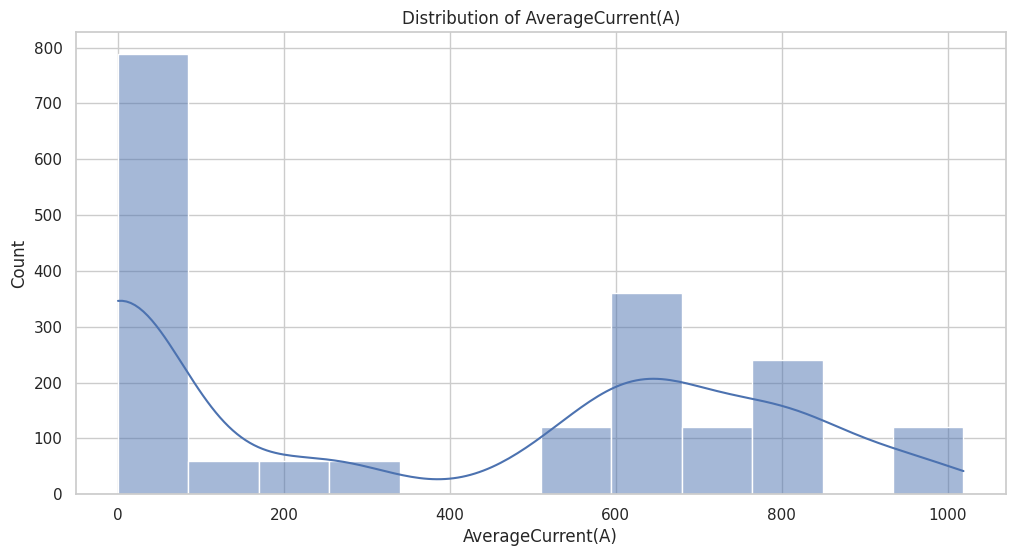

In [ ]:
# Individual Feature Analysis

# Histograms for distribution
plt.figure(figsize=(12, 6))
plt.title("Distribution of AverageCurrent(A)")
sns.histplot(genset_data['AverageCurrent(A)'], kde=True)
plt.show()

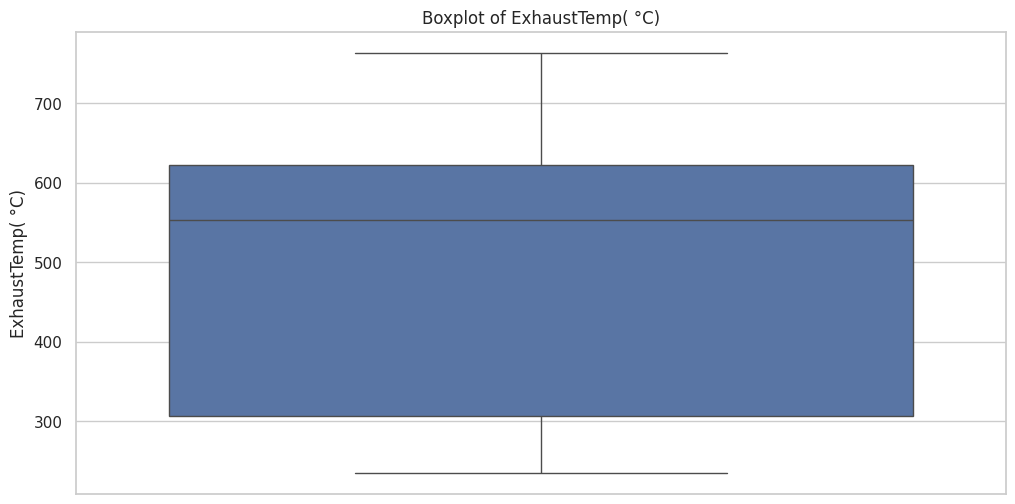

In [ ]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
plt.title("Boxplot of ExhaustTemp( °C)")
sns.boxplot(y=genset_data['ExhaustTemp( °C)'])
plt.show()

<ipython-input-99-eb598c027af4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = genset_data.corr()


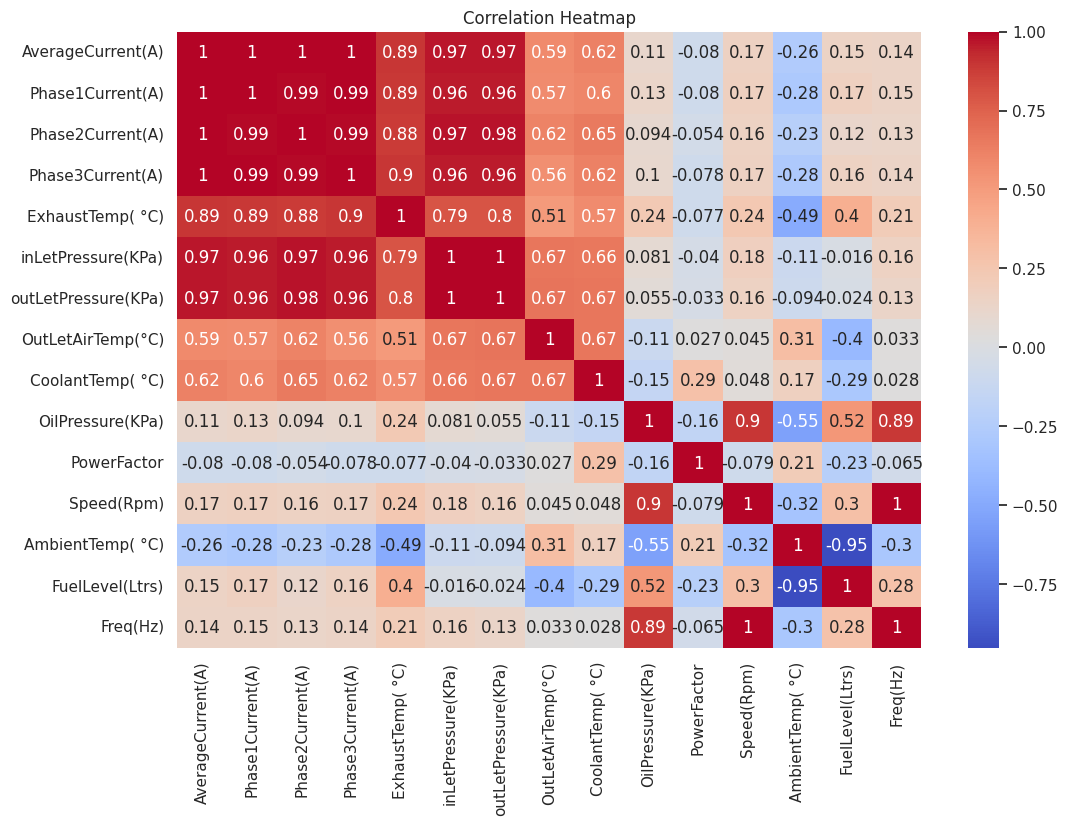

In [ ]:
# Correlation Analysis
correlation_matrix = genset_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

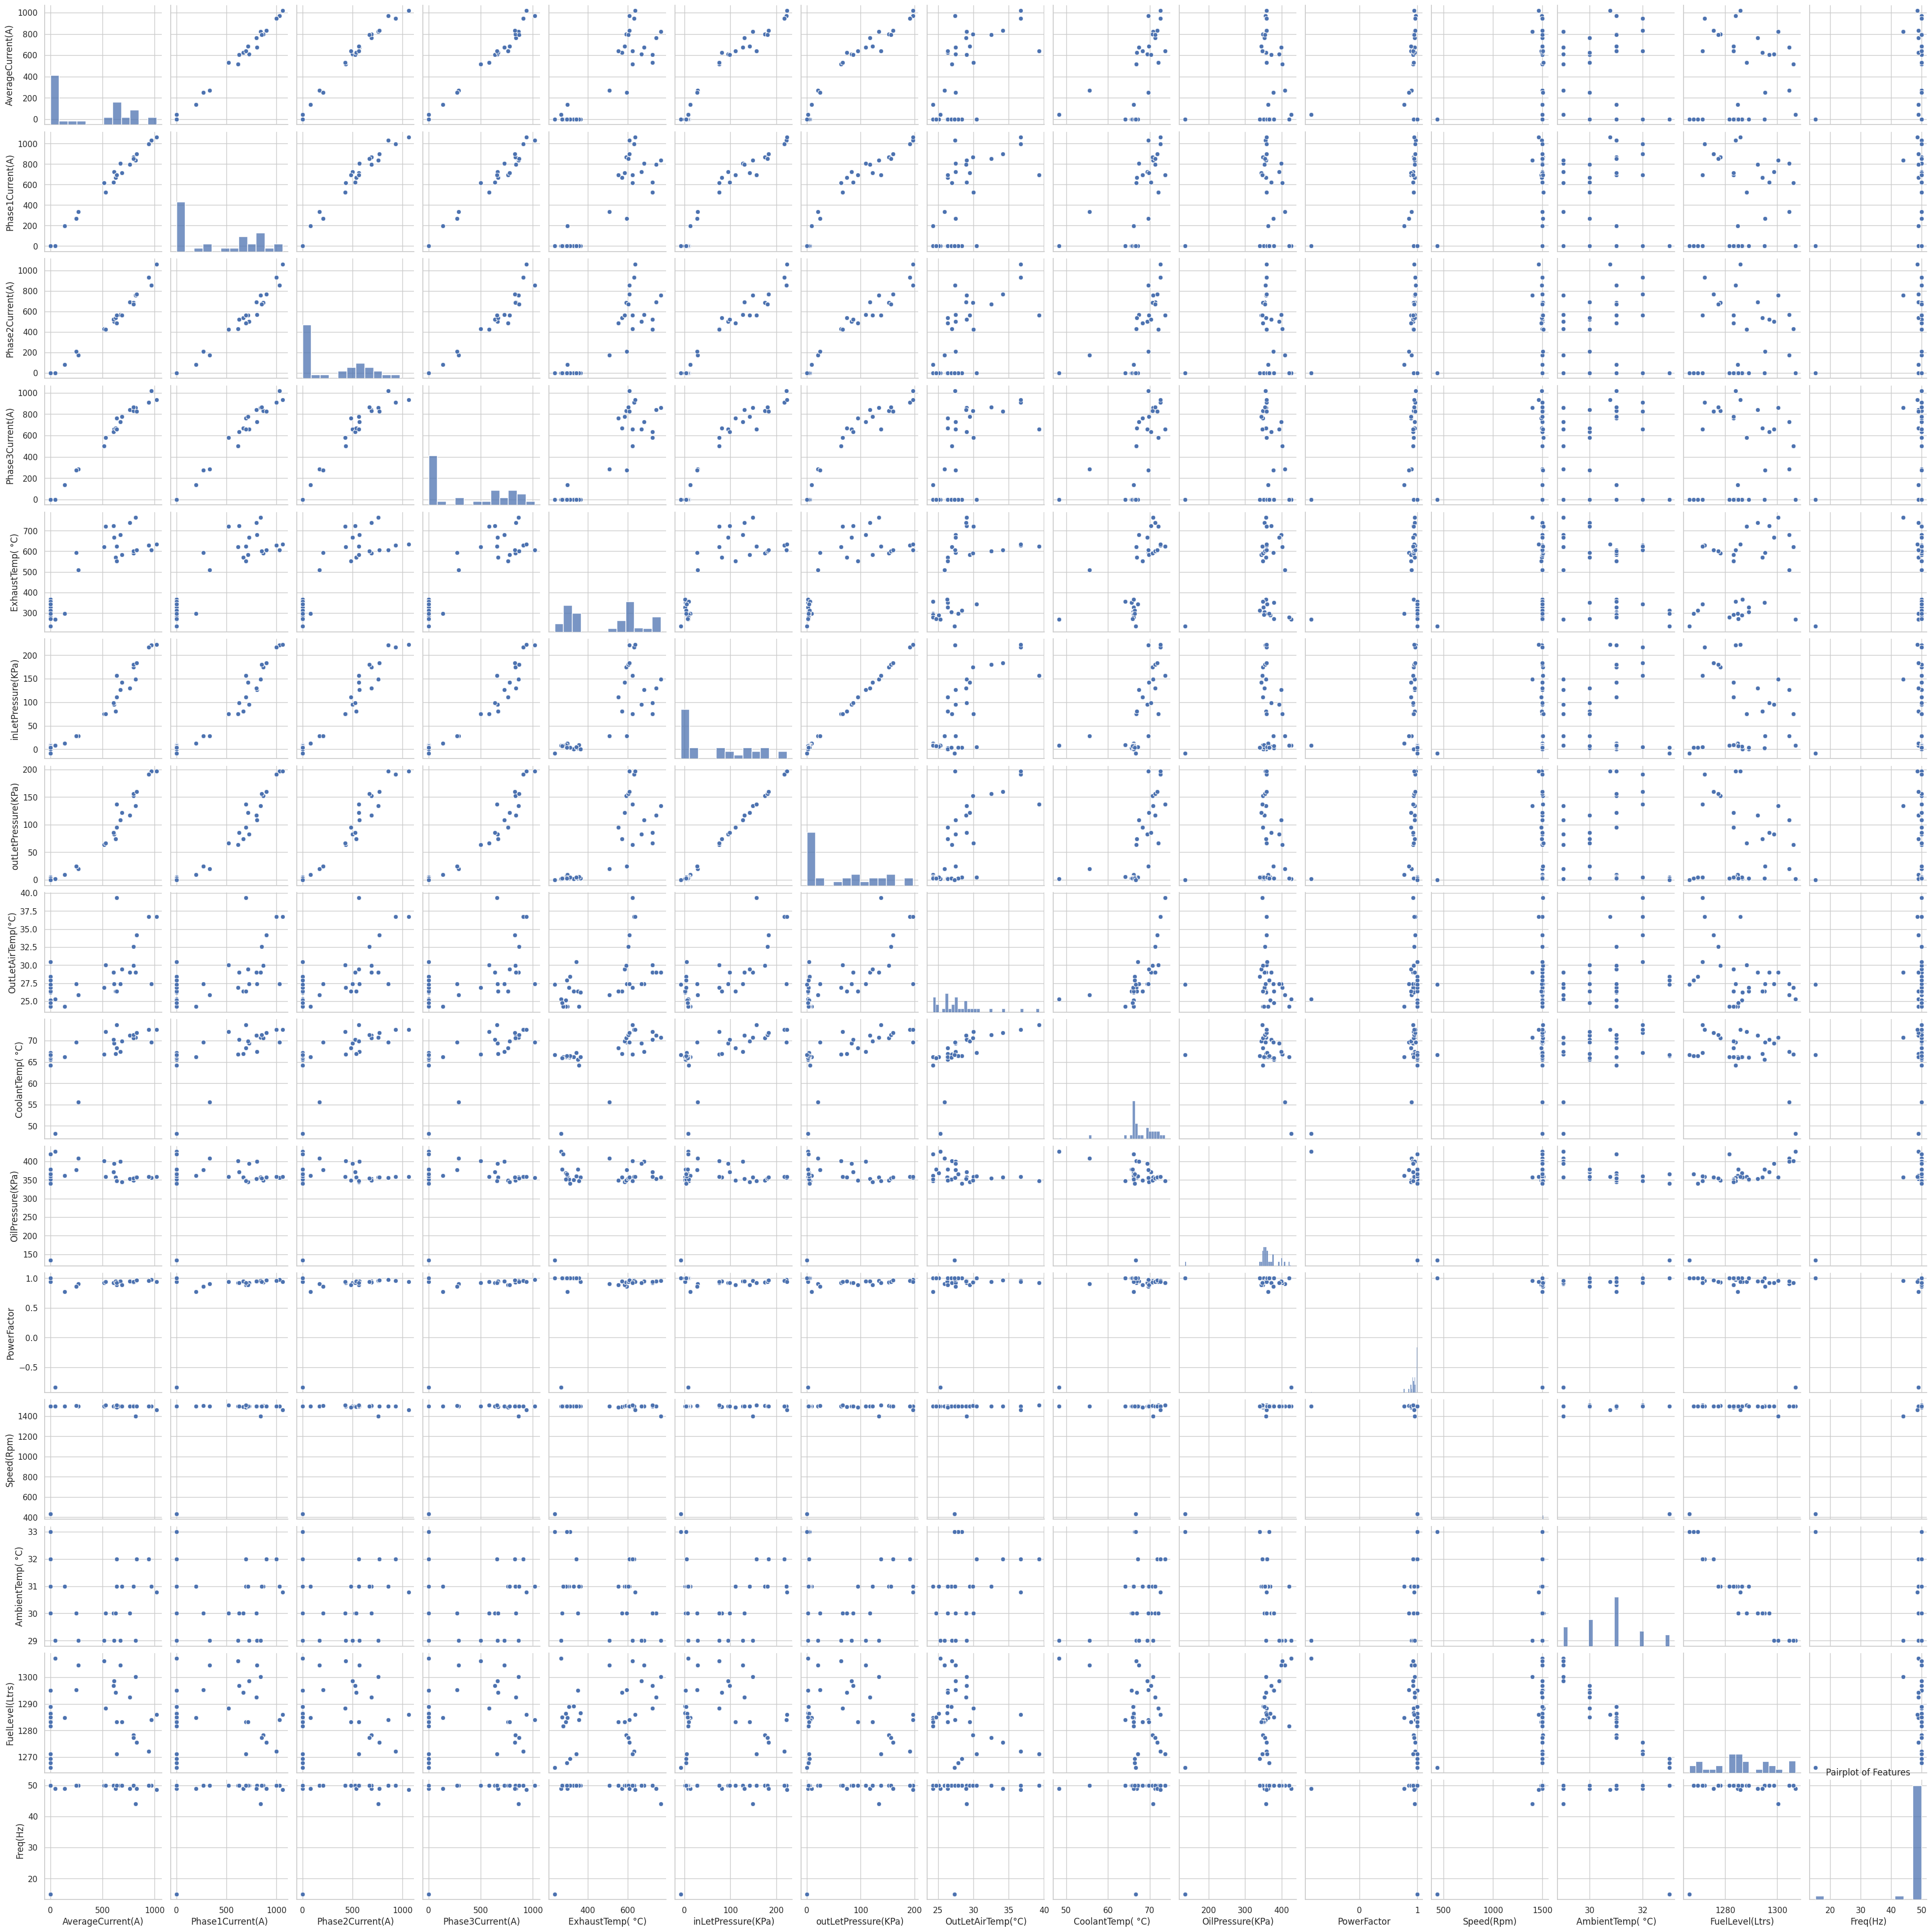

<Figure size 640x480 with 0 Axes>

In [ ]:
# Pairplot for Relationships

sns.pairplot(genset_data)
plt.title("Pairplot of Features")
plt.show()
# Save the plot with a high resolution
plt.savefig('pairplot_high_res.svg', dpi=600)

**Distribution of Average Current (A)**

<ul>
<li>The histogram shows that the most common average current values are clustered around the lower end of the scale, with a significant peak at the beginning of the distribution.
<li>There are several other smaller peaks present, suggesting that the genset operates at several distinct load levels.
<li>The long tail to the right indicates that there are periods where the genset operates at higher current levels, which may be less common but could be significant in terms of stress on the genset.
</ul>

Hypothesis: The genset is primarily used at a low to moderate load but occasionally runs at higher loads. The operational patterns could be related to specific time periods or external factors that should be investigated.

**Boxplot of Exhaust Temperature (°C)**

<ul>
<li>The boxplot does not show the typical characteristics, such as median, quartiles, or outliers. This could indicate that the exhaust temperature has a very narrow range of values without much variation, or it could be a result of the visualization scale being skewed by outliers.
<li>Given the lack of visible variation in the boxplot, it may be necessary to inspect the raw data or adjust the scale of the plot to better understand the distribution.
</ul>

Hypothesis: The exhaust temperature is generally consistent, possibly indicating stable genset operation or an issue with the temperature sensor or data recording process.

**Correlation Heatmap**

<ul>
<li>The current-related features (AverageCurrent, Phase1Current, Phase2Current, Phase3Current) are highly correlated with each other, as expected since they should all reflect the load on the genset.
<li>Exhaust temperature shows a moderate to high correlation with current-related features, suggesting that as the load increases, the exhaust temperature does as well.
<li>There's a strong negative correlation between ambient temperature and fuel level, which could suggest higher fuel consumption at higher temperatures or a data recording pattern.
</ul>

Hypothesis: The genset's operating parameters are closely interrelated, with electrical load impacting temperature measurements. There may also be environmental or operational factors influencing fuel consumption.

# Feature Engineering

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## 1. Domain-Based Features:

In [ ]:
genset_data['Load_Factor'] = genset_data['AverageCurrent(A)'] / genset_data['Phase1Current(A)'].max()

In [ ]:
genset_data['Temp_Gradient'] = genset_data['ExhaustTemp( °C)'] - genset_data['CoolantTemp( °C)']

In [ ]:
#genset_data['Temp_Rise_Rate'] = genset_data['ExhaustTemp( °C)'].diff()

In [ ]:
genset_data['Pressure_Ratio'] = genset_data['inLetPressure(KPa)'] / genset_data['outLetPressure(KPa)']

In [ ]:
genset_data['Imbalance_Current'] = genset_data[['Phase1Current(A)', 'Phase2Current(A)', 'Phase3Current(A)']].std(axis=1)

In [ ]:
genset_data['Power_Factor_Deviation'] = 1 - genset_data['PowerFactor'].abs()

## 2. Feature Scaling:

In [ ]:
# Identify numerical features

numerical_features = genset_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Anomaly Detection

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv1D, Conv1DTranspose, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import datetime

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
domain_features = ['Load_Factor', 'Temp_Gradient', 'Pressure_Ratio', 'Imbalance_Current','Power_Factor_Deviation']
numerical_features += domain_features

In [ ]:
print("NaN values before scaling:", genset_data[numerical_features].isna().sum().sum())

NaN values before scaling: 0


In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genset_data[numerical_features])

In [ ]:
# Double-check if scaled_data contains any NaN values
assert not np.isnan(scaled_data).any(), "Scaled data contains NaN after re-scaling"
assert not np.isinf(scaled_data).any(), "Scaled data contains Inf after re-scaling"

In [ ]:
sequence_length = 10
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        sequence = data[i:(i + seq_length)]
        xs.append(sequence)
    return np.array(xs)

scaled_data_seq = create_sequences(scaled_data, sequence_length)


features = scaled_data.shape[1]

In [ ]:
class TransformerEncoderBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:
# Define the generator and discriminator models
def build_generator(seq_length, features):
    model = Sequential([
        layers.Input(shape=(seq_length, features)),
        layers.Conv1D(64, 5, strides=1, padding="causal", activation="relu", dilation_rate=1),
        layers.Conv1D(128, 5, strides=1, padding="causal", activation="relu", dilation_rate=2),
        layers.LayerNormalization(),
        # Transformer block - ensuring it's compatible with input/output dimensions
        TransformerEncoderBlock(embed_dim=128, num_heads=2, ff_dim=32),
        layers.GlobalAveragePooling1D(),
        layers.RepeatVector(seq_length),
        layers.Conv1DTranspose(64, 5, strides=1, padding="same", activation="relu"),
        layers.Conv1DTranspose(features, 5, strides=1, padding="same", activation="tanh"),
    ])
    return model



def build_discriminator(seq_length, features):
    model = Sequential([
        Input(shape=(seq_length, features)),
        Conv1D(64, 5, strides=1, padding="causal", activation="relu"),
        Dropout(0.2),
        Conv1D(128, 5, strides=2, padding="causal", activation="relu"),
        Dropout(0.2),
        Flatten(),
        Dense(1, activation='sigmoid'),
    ])
    return model

In [ ]:
# GAN Class
class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_sequences):
        batch_size = tf.shape(real_sequences)[0]
        noise = tf.random.normal(shape=(batch_size, sequence_length, features))

        # Train discriminator
        with tf.GradientTape() as disc_tape:
            generated_sequences = self.generator(noise, training=True)
            real_output = self.discriminator(real_sequences, training=True)
            fake_output = self.discriminator(generated_sequences, training=True)
            disc_loss = self.loss_fn(tf.ones_like(real_output), real_output) + self.loss_fn(tf.zeros_like(fake_output), fake_output)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        # Train generator
        with tf.GradientTape() as gen_tape:
            generated_sequences = self.generator(noise, training=True)
            fake_output = self.discriminator(generated_sequences, training=True)
            gen_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))

        return {'d_loss': disc_loss, 'g_loss': gen_loss}

In [ ]:
# Model hyperparameters
sequence_length = 10
features = scaled_data.shape[1]
generator = build_generator(sequence_length, features)
discriminator = build_discriminator(sequence_length, features)

In [ ]:
# Compile GAN
gan = GAN(generator=generator, discriminator=discriminator)
gan.compile(
    g_optimizer=Adam(1e-4),
    d_optimizer=Adam(1e-4),
    loss_fn=BinaryCrossentropy(from_logits=False),
)

In [ ]:
# Callbacks
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='g_loss',
    mode='min',
    save_best_only=True)

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
early_stopping_callback = EarlyStopping(
    monitor='g_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True)

In [ ]:
# Train the model
gan.fit(scaled_data_seq, epochs=100, callbacks=[model_checkpoint_callback, tensorboard_callback, early_stopping_callback])

Epoch 1/100
60/60 [==============================] - 21s 81ms/step - d_loss: 1.2363 - g_loss: 0.6108
Epoch 2/100
60/60 [==============================] - 3s 43ms/step - d_loss: 0.9793 - g_loss: 0.7486
Epoch 3/100
60/60 [==============================] - 3s 43ms/step - d_loss: 0.8094 - g_loss: 1.0912
Epoch 4/100
60/60 [==============================] - 3s 43ms/step - d_loss: 0.9909 - g_loss: 0.9397
Epoch 5/100
60/60 [==============================] - 3s 52ms/step - d_loss: 0.5302 - g_loss: 1.3690
Epoch 6/100
60/60 [==============================] - 4s 64ms/step - d_loss: 0.7888 - g_loss: 1.3810
Epoch 7/100
60/60 [==============================] - 3s 45ms/step - d_loss: 0.8480 - g_loss: 1.3750
Epoch 8/100
60/60 [==============================] - 3s 44ms/step - d_loss: 0.7841 - g_loss: 1.5550
Epoch 9/100
60/60 [==============================] - 3s 44ms/step - d_loss: 0.5372 - g_loss: 1.9062
Epoch 10/100
60/60 [==============================] - 4s 62ms/step - d_loss: 0.4708 - g_loss: 2.148

In [ ]:
# Anomaly detection
def detect_anomalies(generator, discriminator, real_data, threshold=0.5):
    # Generate fake sequences
    batch_size = real_data.shape[0]
    random_latent_vectors = tf.random.normal(shape=(batch_size, sequence_length, features))
    generated_sequences = generator.predict(random_latent_vectors)

    # Get discriminator predictions for both real and fake data
    real_predictions = discriminator.predict(real_data)
    fake_predictions = discriminator.predict(generated_sequences)

    # Identify real sequences that are classified as fake
    anomalies = real_data[real_predictions.flatten() < threshold]

    return anomalies, real_predictions, fake_predictions

In [ ]:
def split_data(data, test_size=0.2):
    """
    Splits the data into training and validation sets.
    :param data: The complete dataset.
    :param test_size: The proportion of the dataset to include in the validation split.
    :return: train_data, val_data
    """
    train_data, val_data = train_test_split(data, test_size=test_size, random_state=42)
    return train_data, val_data


In [ ]:
def determine_optimal_threshold(generator, discriminator, val_data, num_trials=50):
    """
    Determines the optimal threshold for anomaly detection.
    :param generator: The trained generator model.
    :param discriminator: The trained discriminator model.
    :param val_data: Validation data to test the threshold.
    :param num_trials: Number of trials to average for determining the threshold.
    :return: optimal_threshold
    """
    thresholds = np.linspace(0, 1, num_trials)
    optimal_threshold = 0
    best_accuracy = 0

    for threshold in thresholds:
        correct_predictions = 0
        total_predictions = 0

        for sequence in val_data:
            real_prediction = discriminator.predict(np.array([sequence]))
            is_real = real_prediction > threshold

            correct_predictions += int(is_real)
            total_predictions += 1

        accuracy = correct_predictions / total_predictions
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_threshold = threshold

    return optimal_threshold


In [ ]:
# Split my data into training and validation sets
train_data, val_data = split_data(scaled_data_seq, test_size=0.2)

# Determine the optimal threshold using the validation data
optimal_threshold = determine_optimal_threshold(generator, discriminator, val_data)

# Then we use this threshold for anomaly detection
anomalies, real_predictions, fake_predictions = detect_anomalies(generator, discriminator, scaled_data_seq, optimal_threshold)


Streaming output truncated to the last 5000 lines.
60/60 [==============================] - 0s 4ms/step


In [ ]:
optimal_threshold=5

In [ ]:
anomalies, real_predictions, fake_predictions = detect_anomalies(generator, discriminator, scaled_data_seq, optimal_threshold)

60/60 [==============================] - 0s 3ms/step


In [ ]:
real_predictions = gan.discriminator.predict(scaled_data_seq)

60/60 [==============================] - 0s 4ms/step


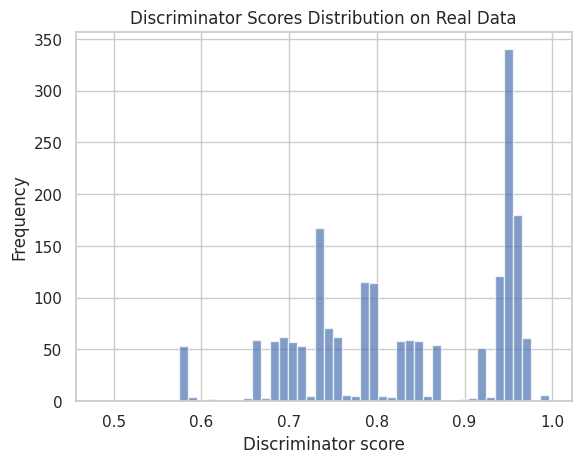

In [ ]:
# Plot the distribution of discriminator scores for real data
plt.hist(real_predictions, bins=50, alpha=0.7)
plt.title('Discriminator Scores Distribution on Real Data')
plt.xlabel('Discriminator score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
threshold = 0.7

In [ ]:
# Detect anomalies
anomalies_indices = np.where(real_predictions < threshold)[0]
anomalies = scaled_data_seq[anomalies_indices]
print(f"Detected {len(anomalies)} potential anomalies.")

Detected 252 potential anomalies.


In [ ]:
# Save GAN model
gan.generator.save('generator_model.h5')
gan.discriminator.save('discriminator_model.h5')

# Save the StandardScaler
import joblib
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [ ]:
def inverse_transform(scaled_data, scaler):
    return scaler.inverse_transform(scaled_data)

In [ ]:
# Identify characteristics of anomalies
anomalies_data = inverse_transform(anomalies.reshape(-1, features), scaler)


In [ ]:
# Convert anomalies_data back to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies_data, columns=numerical_features)


In [ ]:
# Analyze statistical properties of anomalies
print(anomalies_df.describe())

       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        2520.000000       2520.000000      2.520000e+03   
mean          556.521032        604.230556      4.458639e+02   
std           183.713625        178.573440      1.715111e+02   
min             0.000000          0.000000      5.684342e-14   
25%           516.000000        618.000000      4.310000e+02   
50%           638.000000        692.000000      5.380000e+02   
75%           685.000000        714.000000      5.650000e+02   
max           968.000000       1030.000000      8.560000e+02   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       2520.000000       2520.000000         2520.000000   
mean         622.289286        556.003015           93.019197   
std          214.039294         49.117794           45.834263   
min            0.000000        272.076200            0.777893   
25%          500.000000        553.246300           75.635070   
50%          668.000000        56

In [ ]:
# Compare with overall dataset statistics
print(genset_data[numerical_features].describe())

       AverageCurrent(A)  Phase1Current(A)  Phase2Current(A)  \
count        1929.000000       1929.000000       1929.000000   
mean          377.021773        409.476931        324.500259   
std           355.377103        381.369756        317.589660   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          0.000000   
50%           269.000000        334.000000        207.000000   
75%           673.000000        725.000000        565.000000   
max          1019.000000       1061.000000       1061.000000   

       Phase3Current(A)  ExhaustTemp( °C)  inLetPressure(KPa)  \
count       1929.000000       1929.000000         1929.000000   
mean         398.961120        490.048312           72.983006   
std          374.911521        169.964874           73.604658   
min            0.000000        235.242500           -8.433533   
25%            0.000000        306.432000            5.849976   
50%          287.000000        55

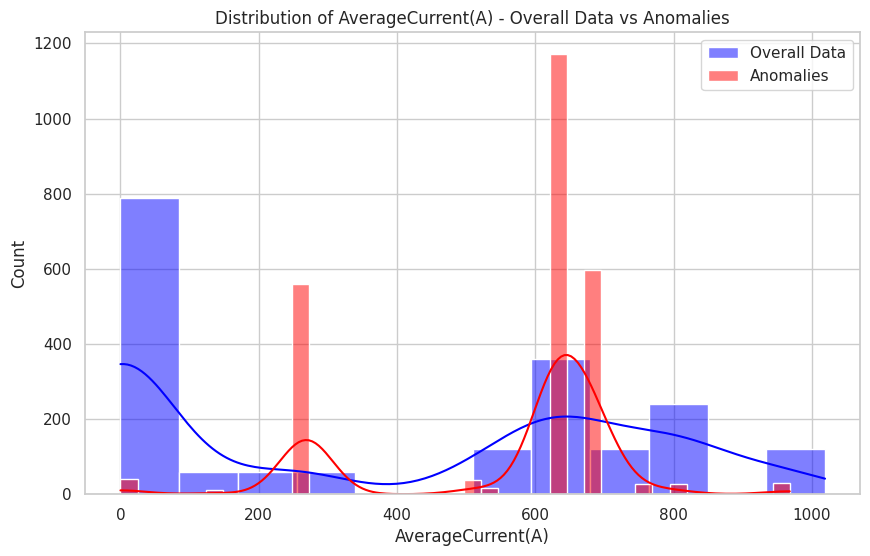

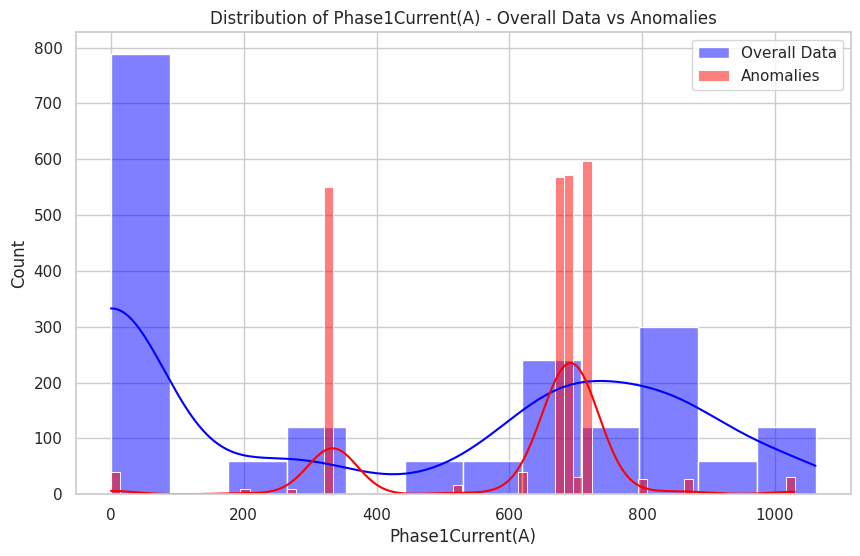

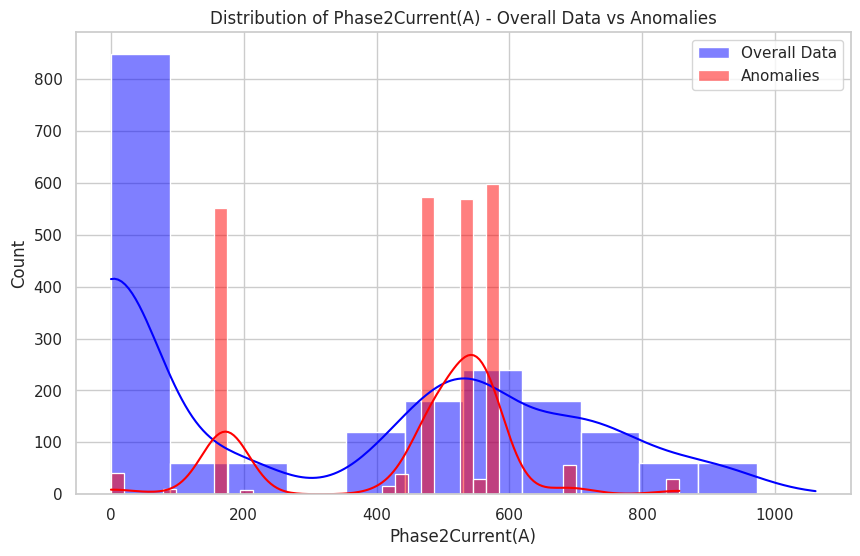

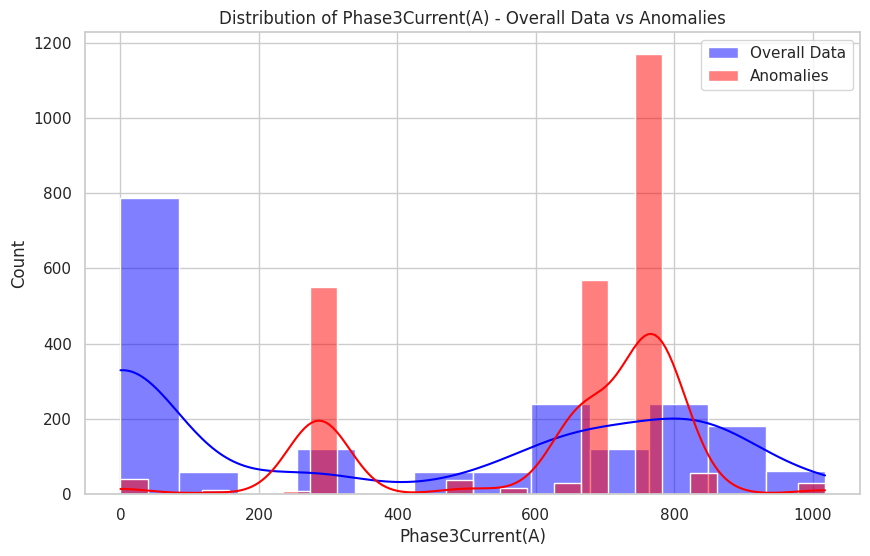

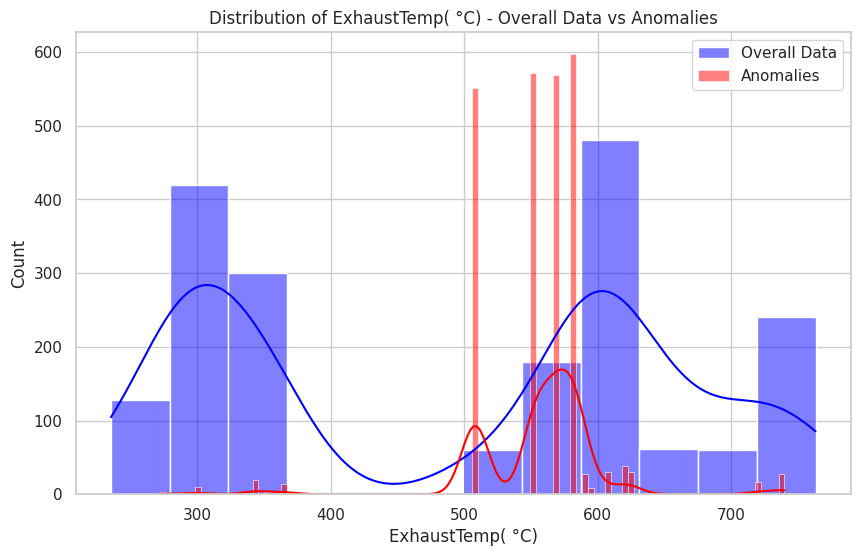

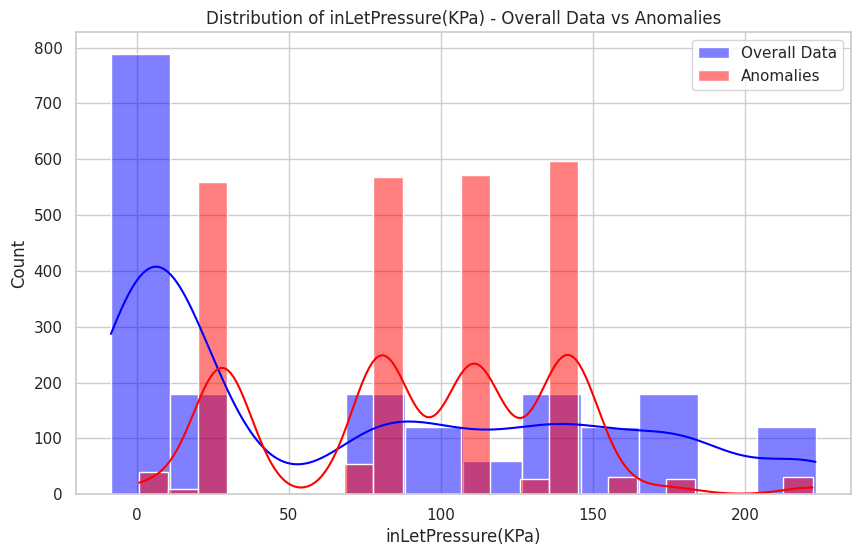

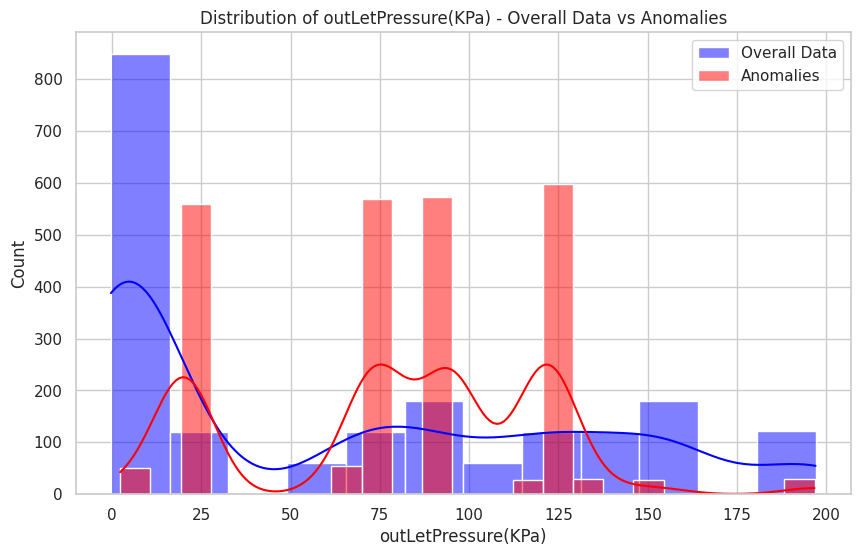

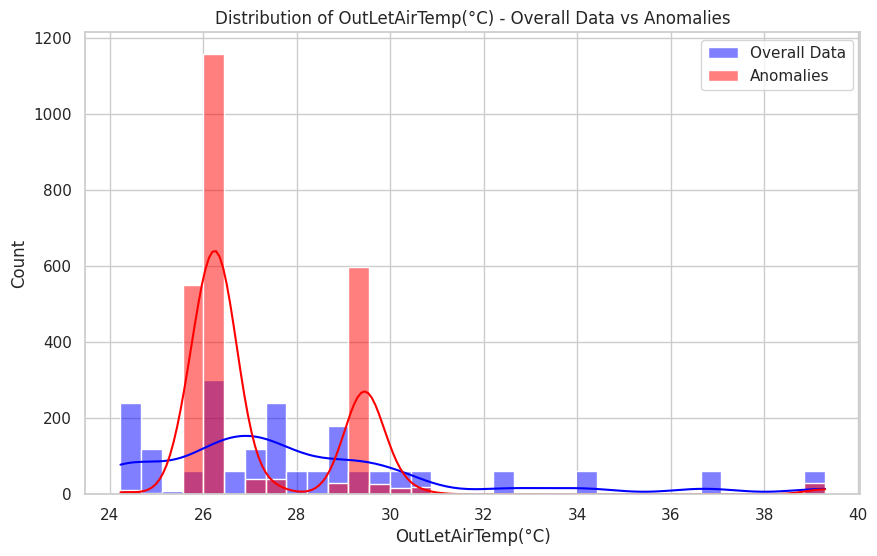

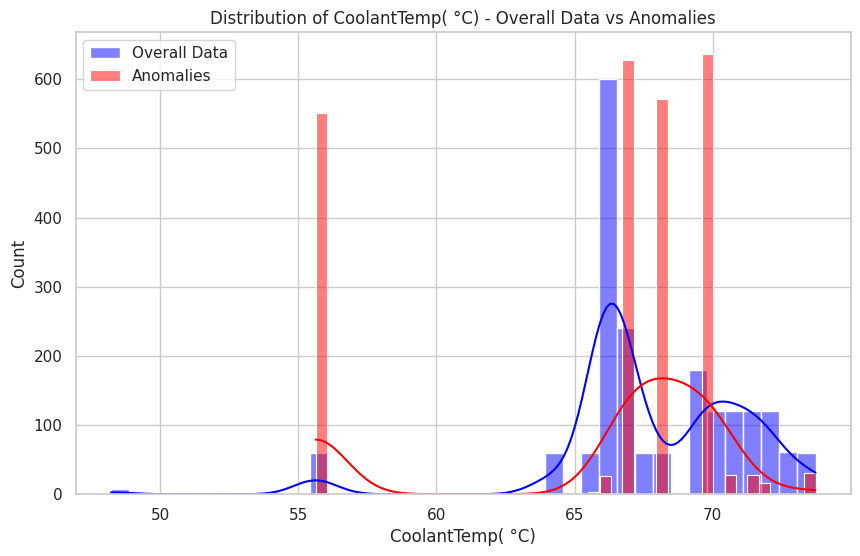

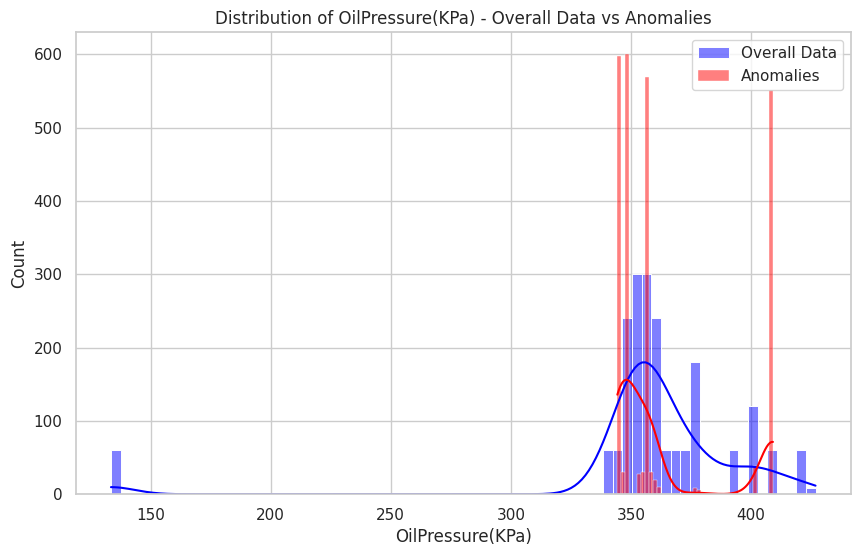

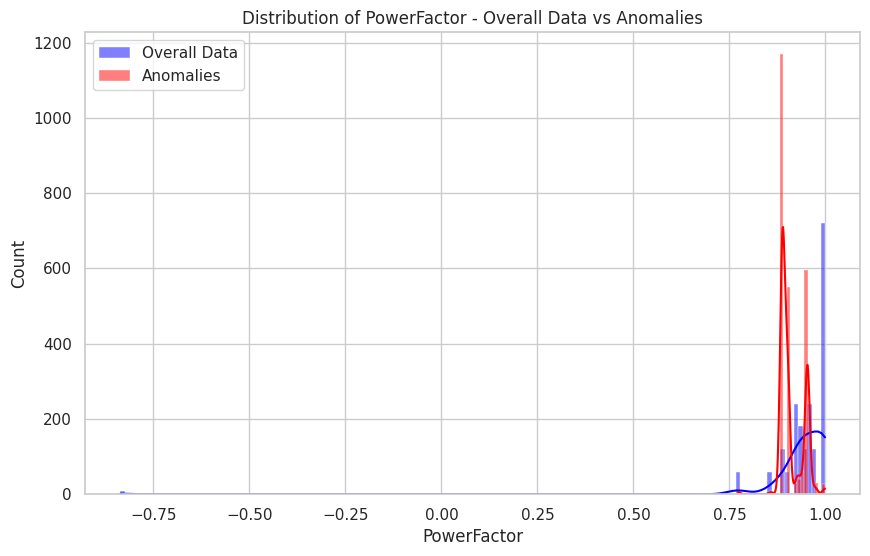

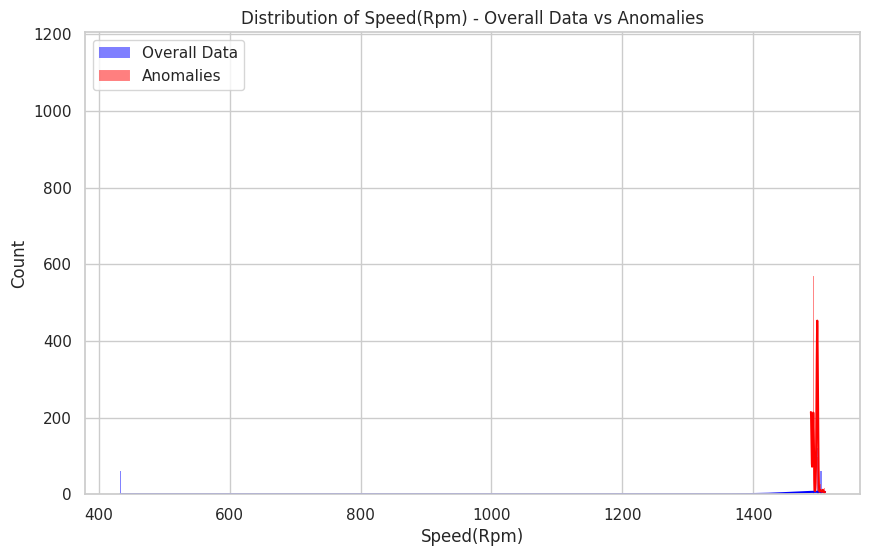

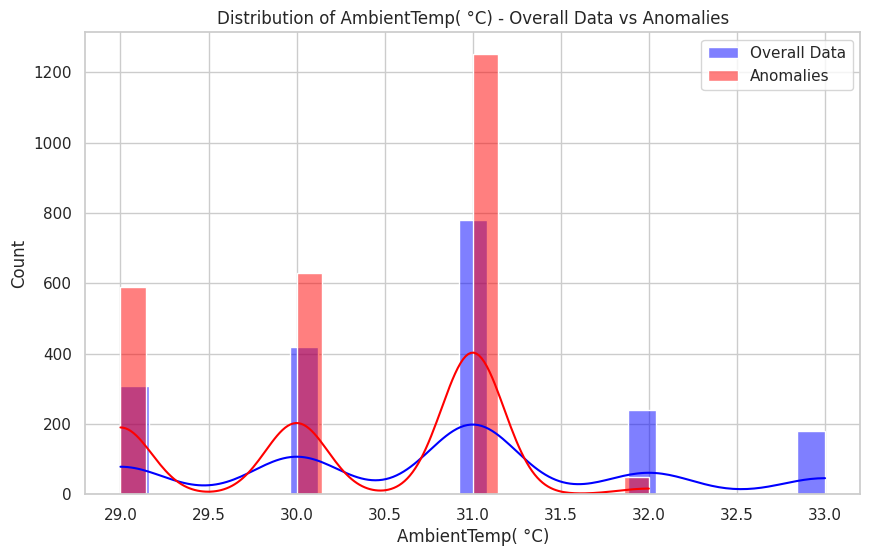

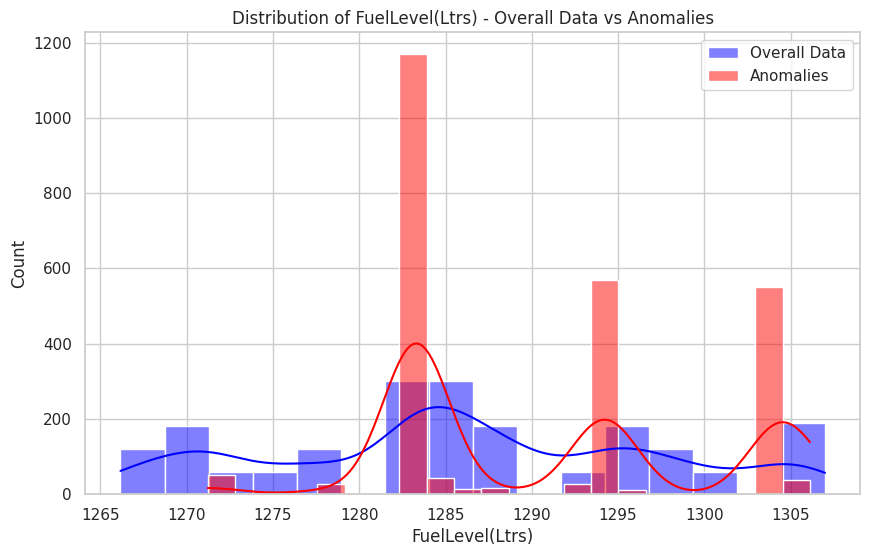

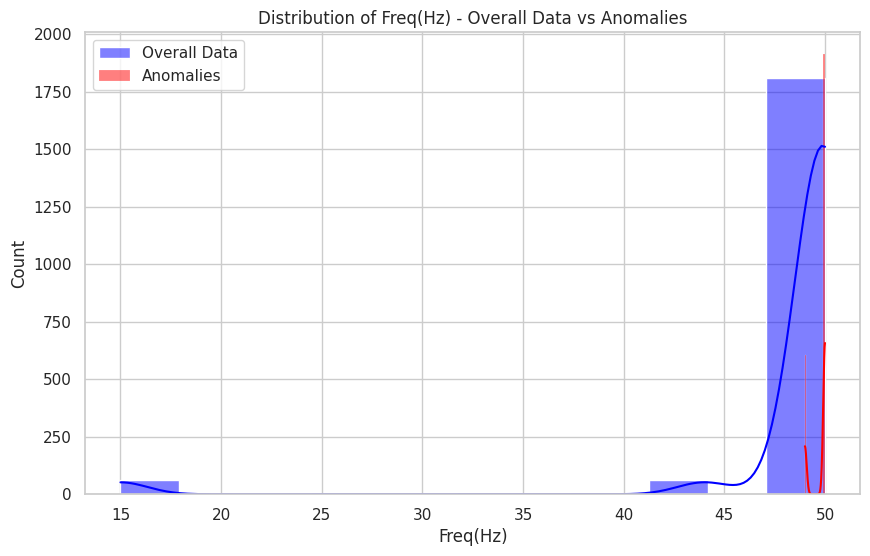

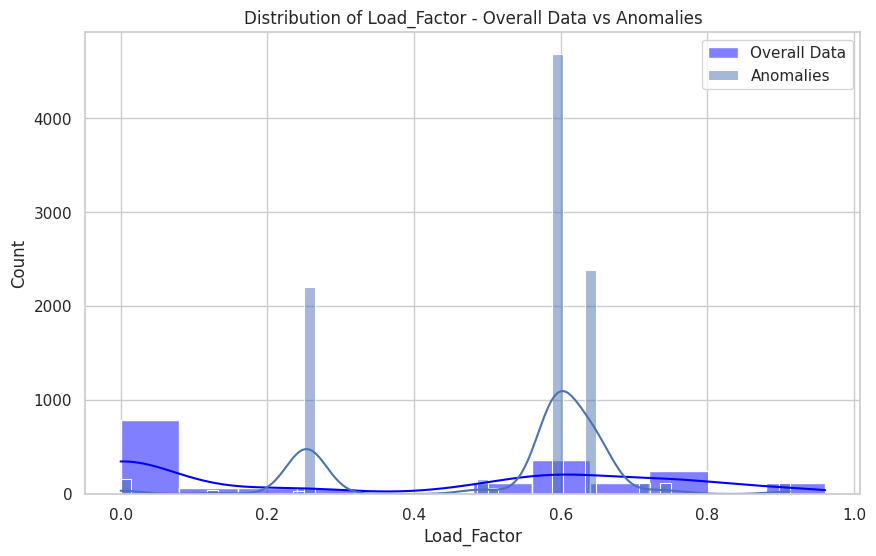

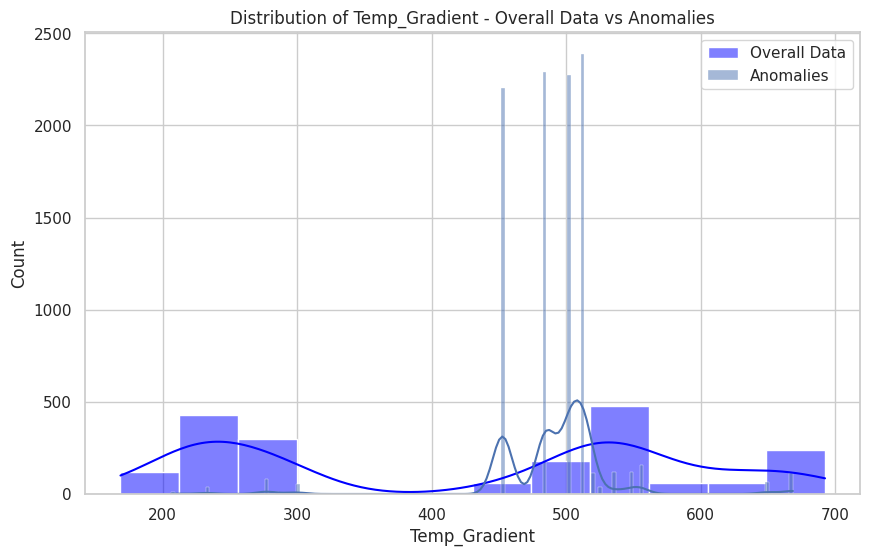

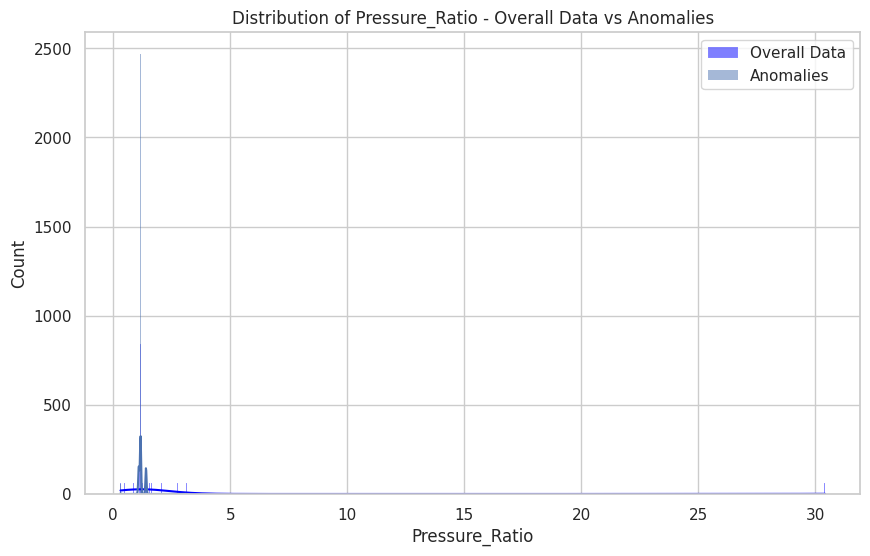

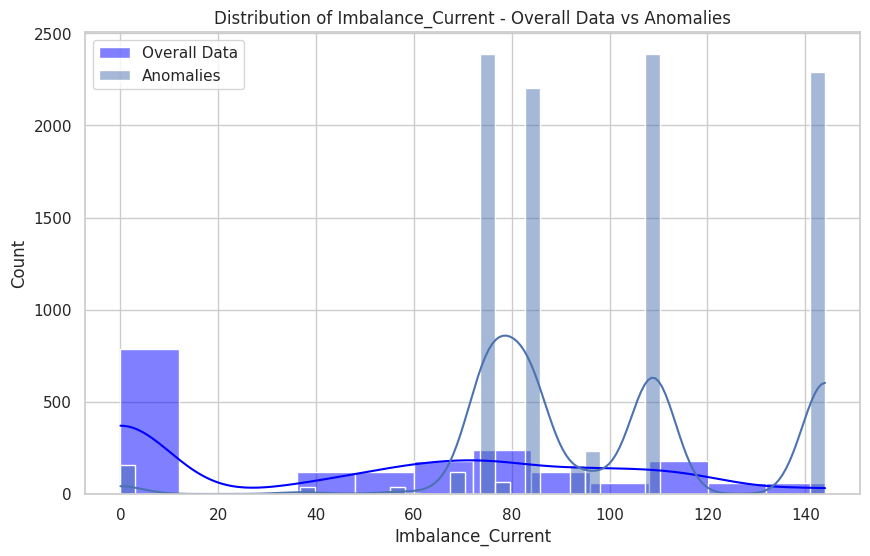

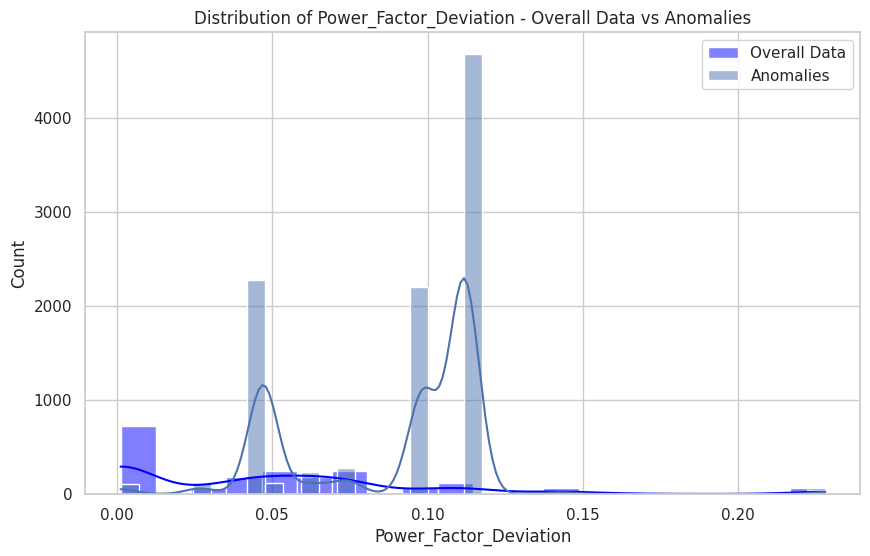

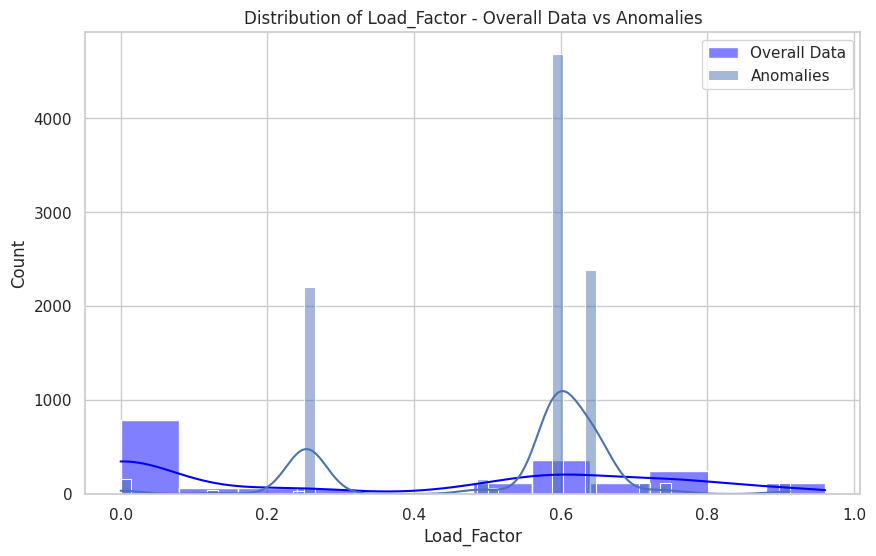

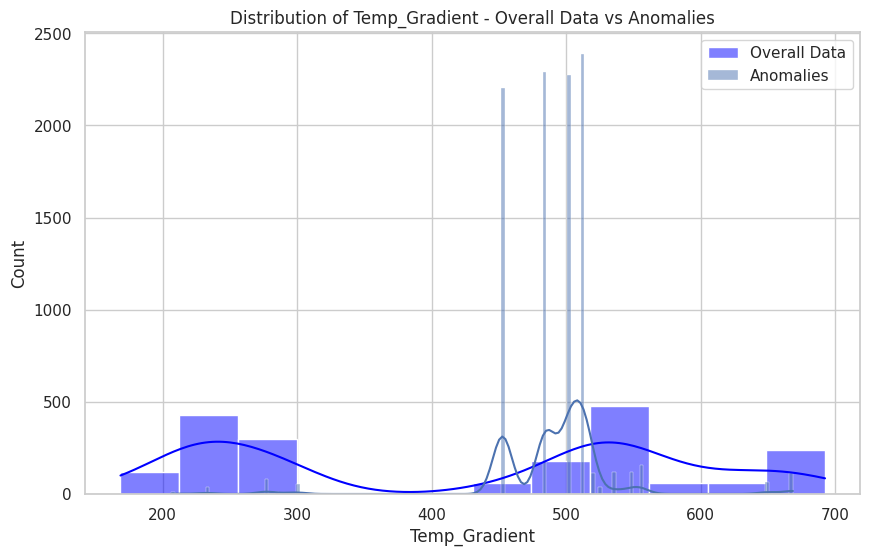

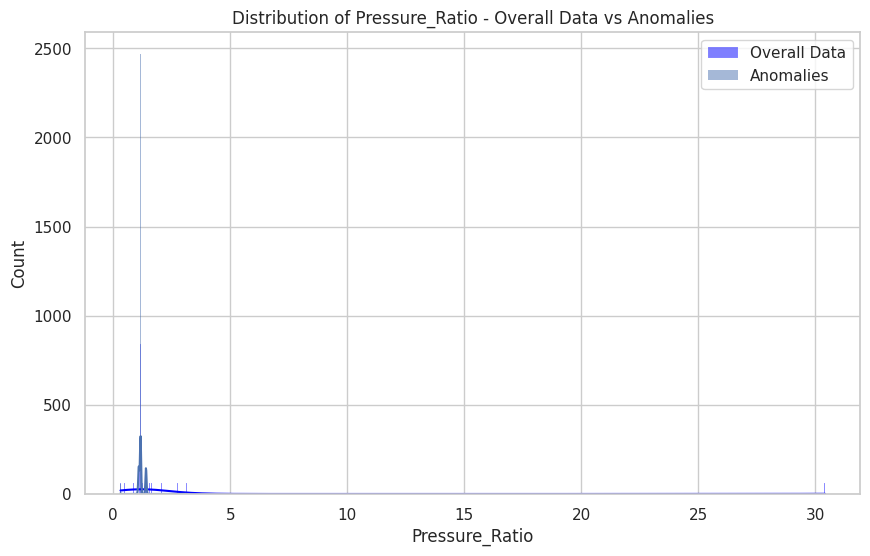

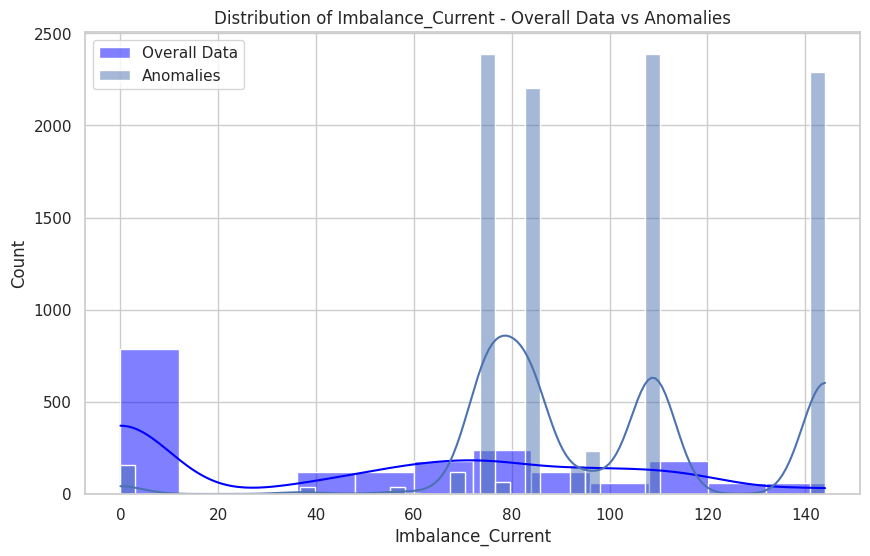

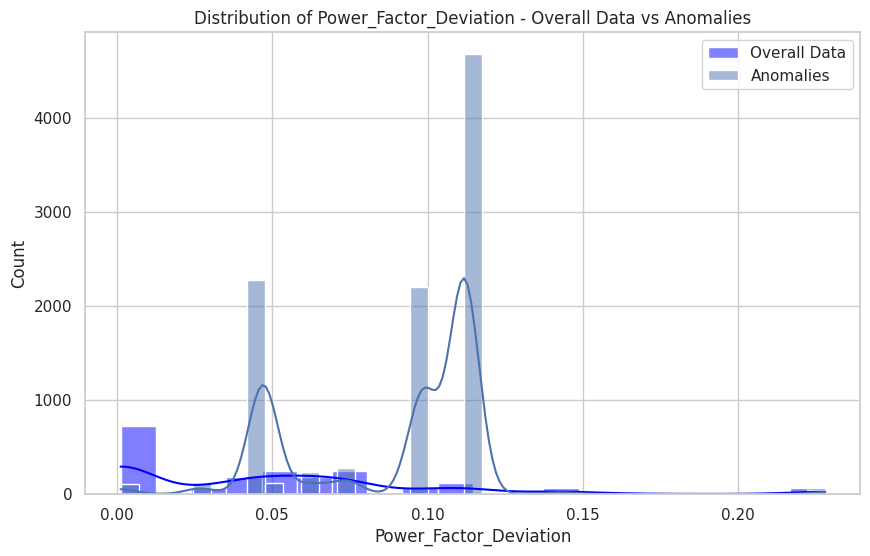

In [ ]:
# Visualize anomalies in the context of the overall data distribution
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(genset_data[feature], color="blue", label="Overall Data", kde=True)
    sns.histplot(anomalies_df[feature], color="red", label="Anomalies", kde=True)
    plt.title(f"Distribution of {feature} - Overall Data vs Anomalies")
    plt.legend()
    plt.show()

# Diagnostic Analytics

In [ ]:
anomalies_df

,AverageCurrent(A),Phase1Current(A),Phase2Current(A),Phase3Current(A),ExhaustTemp( °C),inLetPressure(KPa),outLetPressure(KPa),OutLetAirTemp(°C),CoolantTemp( °C),OilPressure(KPa),PowerFactor,Speed(Rpm),AmbientTemp( °C),FuelLevel(Ltrs),Freq(Hz),Load_Factor,Temp_Gradient,Pressure_Ratio,Imbalance_Current,Power_Factor_Deviation,Load_Factor,Temp_Gradient,Pressure_Ratio,Imbalance_Current,Power_Factor_Deviation
0,269.0,334.0,1.720000e+02,287.0,508.1786,28.237180,20.186100,25.88208,55.625,409.0944,0.901492,1497.75,29.0,1304.468,50.0,0.253534,452.5536,1.398843,83.344666,0.098508,0.253534,452.5536,1.398843,83.344666,0.098508
1,269.0,334.0,1.720000e+02,287.0,508.1786,28.237180,20.186100,25.88208,55.625,409.0944,0.901492,1497.75,29.0,1304.468,50.0,0.253534,452.5536,1.398843,83.344666,0.098508,0.253534,452.5536,1.398843,83.344666,0.098508
2,269.0,334.0,1.720000e+02,287.0,508.1786,28.237180,20.186100,25.88208,55.625,409.0944,0.901492,1497.75,29.0,1304.468,50.0,0.253534,452.5536,1.398843,83.344666,0.098508,0.253534,452.5536,1.398843,83.344666,0.098508
3,269.0,334.0,1.720000e+02,287.0,508.1786,28.237180,20.186100,25.88208,55.625,409.0944,0.901492,1497.75,29.0,1304.468,50.0,0.253534,452.5536,1.398843,83.344666,0.098508,0.253534,452.5536,1.398843,83.344666,0.098508
4,269.0,334.0,1.720000e+02,287.0,508.1786,28.237180,20.186100,25.88208,55.625,409.0944,0.901492,1497.75,29.0,1304.468,50.0,0.253534,452.5536,1.398843,83.344666,0.098508,0.253534,452.5536,1.398843,83.344666,0.098508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,0.0,0.0,5.684342e-14,0.0,343.5497,4.975464,4.270203,30.45081,67.125,359.9232,0.998848,1498.50,32.0,1271.215,50.0,0.000000,276.4247,1.165159,0.000000,0.001152,0.000000,276.4247,1.165159,0.000000,0.001152
2516,0.0,0.0,5.684342e-14,0.0,343.5497,4.975464,4.270203,30.45081,67.125,359.9232,0.998848,1498.50,32.0,1271.215,50.0,0.000000,276.4247,1.165159,0.000000,0.001152,0.000000,276.4247,1.165159,0.000000,0.001152
2517,0.0,0.0,5.684342e-14,0.0,343.5497,4.975464,4.270203,30.45081,67.125,359.9232,0.998848,1498.50,32.0,1271.215,50.0,0.000000,276.4247,1.165159,0.000000,0.001152,0.000000,276.4247,1.165159,0.000000,0.001152
2518,0.0,0.0,5.684342e-14,0.0,343.5497,4.975464,4.270203,30.45081,67.125,359.9232,0.998848,1498.50,32.0,1271.215,50.0,0.000000,276.4247,1.165159,0.000000,0.001152,0.000000,276.4247,1.165159,0.000000,0.001152


In [ ]:
# Export the anomalies DataFrame to a CSV file
anomalies_df.to_csv('anomalies_with_expert_interpretations.csv', index=False)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
# Define the features of interest
features_of_interest = [
    'AverageCurrent(A)', 'Phase1Current(A)', 'Phase2Current(A)', 'Phase3Current(A)',
    'ExhaustTemp( °C)', 'CoolantTemp( °C)', 'Temp_Gradient',
    'PowerFactor', 'Freq(Hz)', 'Speed(Rpm)', 'OilPressure(KPa)',
    'Imbalance_Current'
]

# Calculate and print the mean and standard deviation for anomalies
print("Anomalies - Statistical Measures:")
print(anomalies_df[features_of_interest].agg(['mean', 'std']).transpose())

# Calculate and print the mean and standard deviation for the overall dataset
print("\nOverall Dataset - Statistical Measures:")
print(genset_data[features_of_interest].agg(['mean', 'std']).transpose())

Anomalies - Statistical Measures:
                          mean         std
AverageCurrent(A)   556.521032  183.713625
Phase1Current(A)    604.230556  178.573440
Phase2Current(A)    445.863889  171.511090
Phase3Current(A)    622.289286  214.039294
ExhaustTemp( °C)    556.003015   49.117794
CoolantTemp( °C)     65.692498    5.478635
Temp_Gradient       490.310518   46.048614
Temp_Gradient       490.310518   46.048614
PowerFactor           0.910244    0.030198
Freq(Hz)             49.759127    0.427698
Speed(Rpm)         1494.648958    4.595247
OilPressure(KPa)    364.238606   25.102129
Imbalance_Current    99.945921   29.316773
Imbalance_Current    99.945921   29.316773

Overall Dataset - Statistical Measures:
                          mean         std
AverageCurrent(A)   377.021773  355.377103
Phase1Current(A)    409.476931  381.369756
Phase2Current(A)    324.500259  317.589660
Phase3Current(A)    398.961120  374.911521
ExhaustTemp( °C)    490.048312  169.964874
CoolantTemp( °C)     6

In [ ]:
# Custom Tokenizer with Domain Technical Terms
from transformers import GPT2Tokenizer

# Load base tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Technical terms from dataset column names

technical_terms = [
    "AverageCurrent(A)", "Phase1Current(A)", "Phase2Current(A)", "Phase3Current(A)",
    "ExhaustTemp( °C)", "inLetPressure(KPa)", "outLetPressure(KPa)", "OutLetAirTemp(°C)",
    "CoolantTemp(°C)", "OilPressure(KPa)", "Vibration(m/s²)", "AmbientTemp( °C)",
    "FuelLevel(Ltrs)", "Freq(Hz)", "Load_Factor", "Temp_Gradient", "Pressure_Ratio",
    "Imbalance_Current", "Power_Factor_Deviation"
]

# Add technical terms to the tokenizer
num_added_toks = tokenizer.add_tokens(technical_terms)
print(f"Added {num_added_toks} new tokens to the tokenizer.")


Added 19 new tokens to the tokenizer.


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final_Year_Project/anomalies_with_expert_interpretations_12_02_24.csv')

In [ ]:
data

,AverageCurrent(A),Phase1Current(A),Phase2Current(A),Phase3Current(A),ExhaustTemp( °C),inLetPressure(KPa),outLetPressure(KPa),OutLetAirTemp(°C),CoolantTemp( °C),OilPressure(KPa),...,AmbientTemp( °C),FuelLevel(Ltrs),Freq(Hz),Load_Factor,Temp_Gradient,Pressure_Ratio,Imbalance_Current,Power_Factor_Deviation,Expert_Interpretation,Recommended_Actions
0,269,334,1.720000e+02,287,508.1786,28.237180,20.186100,25.88208,55.62500,409.0944,...,29,1304.468,50,0.253534,452.55360,1.398843,83.344666,0.098508,Electrical load imbalance observed with potent...,Rebalance electrical loads; inspect air intake...
1,516,618,4.310000e+02,500,621.8289,75.635070,63.444700,26.91455,66.81250,401.4816,...,29,1306.120,50,0.486334,555.01640,1.192142,94.563911,0.073620,Cooling system potentially underperforming des...,Inspect cooling system and ensure adequate ven...
2,269,334,1.720000e+02,287,508.1786,28.237180,20.186100,25.88208,55.62500,409.0944,...,29,1304.468,50,0.253534,452.55360,1.398843,83.344666,0.098508,Electrical load imbalance observed with potent...,Check electrical distribution and air intake p...
3,604,624,5.240000e+02,635,722.4698,99.013370,85.773620,29.00531,70.25000,371.4048,...,30,1296.884,50,0.569274,652.21980,1.154357,61.158265,0.073498,Cooling system potentially underperforming des...,Perform cooling system maintenance and monitor...
4,250,268,2.070000e+02,274,594.3132,27.887390,24.675170,27.43079,69.65625,377.1456,...,30,1295.231,50,0.235627,524.65695,1.130180,37.072002,0.142428,Electrical load imbalance observed with potent...,Regularly inspect electrical connections and a...
5,0,0,5.680000e-14,0,350.7512,2.643494,2.579468,26.37250,65.59375,378.2688,...,30,1295.134,50,0.000000,285.15745,1.024821,0.000000,0.001152,Potential inefficiency in combustion or coolin...,Evaluate combustion process and inspect coolin...
6,625,669,5.380000e+02,668,569.1981,80.940370,74.288510,26.37250,66.96875,357.4272,...,30,1294.258,49,0.589067,502.22935,1.089541,75.345869,0.046963,Air intake or turbocharger performance below e...,Inspect and clean air intake system; check tur...
7,763,797,6.910000e+02,839,739.8156,130.262100,117.488800,28.97952,71.28125,353.4336,...,30,1292.508,49,0.719133,668.53435,1.108719,76.271445,0.048305,High exhaust temperatures indicate possible ov...,Monitor load levels; inspect and maintain cool...
8,533,523,4.250000e+02,579,721.6954,75.285280,66.184810,30.01199,72.03125,359.1744,...,30,1288.327,50,0.502356,649.66415,1.137501,77.948701,0.060749,Imbalance in phase currents suggests electrica...,Check and rebalance phase loads; inspect for w...
9,137,195,8.100000e+01,136,298.2238,12.962590,9.225708,24.23010,66.18750,362.4192,...,31,1284.827,49,0.129123,232.03630,1.405051,57.011695,0.227950,Repeated low inlet pressure points to air inta...,Ensure air filters are clean; inspect intake p...


In [ ]:
# Formatting Dataset into Prompt-Response Pairs

def create_prompt_response_pairs(row):
    # Construct the prompt using selected measurements
    prompt = "Given the generator measurements: " + \
             ", ".join([f"{col} is {row[col]}" for col in technical_terms if col in row])

    prompt = prompt + ", what are the potential issues and recommended actions?"
    # Construct the response with interpretation and recommendations
    completion = f"Interpretation: {row['Expert_Interpretation']} " + \
               f"Recommendation: {row['Recommended_Actions']}"

    return prompt, completion

# Generate prompt-response pairs
prompt_response_pairs = [create_prompt_response_pairs(row) for _, row in data.iterrows()]

In [ ]:
prompt_response_pairs

[('Given the generator measurements: AverageCurrent(A) is 269, Phase1Current(A) is 334, Phase2Current(A) is 172.0, Phase3Current(A) is 287, ExhaustTemp( °C) is 508.1786, inLetPressure(KPa) is 28.23718, outLetPressure(KPa) is 20.1861, OutLetAirTemp(°C) is 25.88208, OilPressure(KPa) is 409.0944, AmbientTemp( °C) is 29, FuelLevel(Ltrs) is 1304.468, Freq(Hz) is 50, Load_Factor is 0.2535344015, Temp_Gradient is 452.5536, Pressure_Ratio is 1.398842768, Imbalance_Current is 83.3446659, Power_Factor_Deviation is 0.098508, what are the potential issues and recommended actions?',
  'Interpretation: Electrical load imbalance observed with potential air intake inefficiencies. Recommendation: Rebalance electrical loads; inspect air intake and turbocharger.'),
 ('Given the generator measurements: AverageCurrent(A) is 516, Phase1Current(A) is 618, Phase2Current(A) is 431.0, Phase3Current(A) is 500, ExhaustTemp( °C) is 621.8289, inLetPressure(KPa) is 75.63507, outLetPressure(KPa) is 63.4447, OutLetAir

In [ ]:
def create_jsonl_messages(row):
    system_message = {
        "role": "system",
        "content": "Jenny is an expert generator technician who interprets our generator data anomalies and gives us her expert recommendations."
    }

    user_message = {
        "role": "user",
        "content": f"Given the generator measurements: AverageCurrent(A) is {row['AverageCurrent(A)']}, " +
                   f"Phase1Current(A) is {row['Phase1Current(A)']}, Phase2Current(A) is {row['Phase2Current(A)']}, " +
                   f"Phase3Current(A) is {row['Phase3Current(A)']}, ExhaustTemp(°C) is {row['ExhaustTemp( °C)']}, " +
                   f"inLetPressure(KPa) is {row['inLetPressure(KPa)']}, outLetPressure(KPa) is {row['outLetPressure(KPa)']}, " +
                   f"OutLetAirTemp(°C) is {row['OutLetAirTemp(°C)']}, OilPressure(KPa) is {row['OilPressure(KPa)']}, " +
                   f"AmbientTemp(°C) is {row['AmbientTemp( °C)']}, FuelLevel(Ltrs) is {row['FuelLevel(Ltrs)']}, " +
                   f"Freq(Hz) is {row['Freq(Hz)']}, Load_Factor is {row['Load_Factor']}, " +
                   f"Temp_Gradient is {row['Temp_Gradient']}, Pressure_Ratio is {row['Pressure_Ratio']}, " +
                   f"Imbalance_Current is {row['Imbalance_Current']}, Power_Factor_Deviation is {row['Power_Factor_Deviation']} " +
                   "what are the potential issues and recommended actions?"
    }

    assistant_message = {
        "role": "assistant",
        "content": f"Interpretation: {row['Expert_Interpretation']} Recommendation: {row['Recommended_Actions']}"
    }

    return {"messages": [system_message, user_message, assistant_message]}


In [ ]:
structured_messages = [create_jsonl_messages(row) for _, row in data.iterrows()]

In [ ]:
structured_messages

[{'messages': [{'role': 'system',
    'content': 'Jenny is an expert generator technician who interprets our generator data anomalies and gives us her expert recommendations.'},
   {'role': 'user',
    'content': 'Given the generator measurements: AverageCurrent(A) is 269, Phase1Current(A) is 334, Phase2Current(A) is 172.0, Phase3Current(A) is 287, ExhaustTemp(°C) is 508.1786, inLetPressure(KPa) is 28.23718, outLetPressure(KPa) is 20.1861, OutLetAirTemp(°C) is 25.88208, OilPressure(KPa) is 409.0944, AmbientTemp(°C) is 29, FuelLevel(Ltrs) is 1304.468, Freq(Hz) is 50, Load_Factor is 0.2535344015, Temp_Gradient is 452.5536, Pressure_Ratio is 1.398842768, Imbalance_Current is 83.3446659, Power_Factor_Deviation is 0.098508 what are the potential issues and recommended actions?'},
   {'role': 'assistant',
    'content': 'Interpretation: Electrical load imbalance observed with potential air intake inefficiencies. Recommendation: Rebalance electrical loads; inspect air intake and turbocharger.

In [ ]:
jsonl_file_path = '/content/drive/My Drive/Colab Notebooks/structured_dataset.jsonl'

In [ ]:
from sklearn.model_selection import train_test_split
import json

# Splitting the dataset into training and validation sets
train_pairs, val_pairs = train_test_split(structured_messages, test_size=0.1, random_state=42)

def export_to_jsonl(pairs, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
      for message in structured_messages:
          json.dump(message, file)
          file.write('\n')

# Export the training and validation sets to .jsonl format
export_to_jsonl(train_pairs, '/content/drive/My Drive/Colab Notebooks/Final_Year_Project/train_dataset2.jsonl')
export_to_jsonl(val_pairs, '/content/drive/My Drive/Colab Notebooks/Final_Year_Project/val_dataset2.jsonl')

In [ ]:
from torch.utils.data import Dataset

class GeneratorDataset(Dataset):
    def __init__(self, tokenizer, pairs):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.attn_masks = []

        for prompt, response in pairs:
            # Encode the prompts and responses
            encodings_dict = tokenizer.encode_plus(
                prompt + response,
                truncation=True,
                max_length=512,
                padding="max_length",
                return_tensors="pt"
            )
            self.input_ids.append(encodings_dict['input_ids'])
            self.attn_masks.append(encodings_dict['attention_mask'])

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

# Ensure the tokenizer's pad_token is set
tokenizer.pad_token = tokenizer.eos_token

# Initialize the dataset
dataset = GeneratorDataset(tokenizer, prompt_response_pairs)


In [ ]:
from transformers import GPT2LMHeadModel, AdamW
from torch.utils.data import DataLoader, Dataset
import torch


# Prepare dataset

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Load model
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.resize_token_embeddings(len(tokenizer))  # Update the model's embeddings with new tokenizer size

# Training settings
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
model.train()
for epoch in range(1):  # For demonstration, just 1 epoch
    for batch in dataloader:
        inputs, masks = batch
        inputs, masks = inputs.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch}: Loss {loss.item()}")



model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 0: Loss 2.6235156059265137


('/path/to/save/your/model/tokenizer_config.json',
 '/path/to/save/your/model/special_tokens_map.json',
 '/path/to/save/your/model/vocab.json',
 '/path/to/save/your/model/merges.txt',
 '/path/to/save/your/model/added_tokens.json')

In [ ]:
# Save the fine-tuned model
model.save_pretrained('modelv0.h5')
tokenizer.save_pretrained('tokenizer.pkl')

('tokenizer.pkl/tokenizer_config.json',
 'tokenizer.pkl/special_tokens_map.json',
 'tokenizer.pkl/vocab.json',
 'tokenizer.pkl/merges.txt',
 'tokenizer.pkl/added_tokens.json')

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [64]:
import openai
from openai import OpenAI
import os

In [65]:
# Setting OpenAI API key
os.environ['OPENAI_API_KEY'] = ''

In [66]:
client = OpenAI()

client.fine_tuning.jobs.retrieve("ftjob-Mr2VNzn1SI7C5VKlhL7MBIwt")

FineTuningJob(id='ftjob-Mr2VNzn1SI7C5VKlhL7MBIwt', created_at=1707727048, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:gpt-3.5-turbo-1106:personal::8rMBgWJN', finished_at=1707727363, hyperparameters=Hyperparameters(n_epochs=5, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-1106', object='fine_tuning.job', organization_id='org-WfuGwgac3ElVpg8jr6jkXZS9', result_files=['file-Ond4mIFzgelhU29ATgXQMh7u'], status='succeeded', trained_tokens=22740, training_file='file-PAUuNDb5wJ0xCW9QDCWi6GfH', validation_file='file-xBGStP6IMxSgOpCp9r1Sy9Vd')

In [68]:
content = client.files.retrieve_content("file-Ond4mIFzgelhU29ATgXQMh7u")

<ipython-input-68-10fdcc4b693f>:1: DeprecationWarning: The `.content()` method should be used instead
  content = client.files.retrieve_content("file-Ond4mIFzgelhU29ATgXQMh7u")


In [69]:
content

'step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy\n1,4.13465,0.4375,4.68496,0.22581\n2,4.7751,0.32353,4.46056,0.28571\n3,4.3217,0.36667,4.91287,0.23333\n4,4.70458,0.36667,4.55105,0.28571\n5,3.81214,0.47222,4.46108,0.26471\n6,3.87173,0.44118,3.90015,0.34615\n7,4.21585,0.35484,3.28529,0.35484\n8,3.50112,0.35294,3.70048,0.3\n9,3.89779,0.32143,3.48854,0.32258\n10,3.53189,0.39286,3.39615,0.39394\n11,2.97745,0.41667,3.03607,0.25\n12,2.85115,0.32258,2.76374,0.32353\n13,3.20153,0.45455,2.50027,0.34286\n14,2.8539,0.46154,2.49988,0.36667\n15,2.38065,0.51613,2.38817,0.36111\n16,2.34448,0.45714,2.4219,0.32353\n17,2.77538,0.4,2.36023,0.33333\n18,2.4608,0.4375,2.46153,0.29032\n19,2.17574,0.4,2.34451,0.32143\n20,2.23618,0.43333,2.49832,0.3\n21,2.23997,0.5,2.33665,0.32143\n22,2.14327,0.5,2.39799,0.38235\n23,2.31026,0.46429,2.17847,0.38462\n24,2.36614,0.46667,1.86544,0.45161\n25,1.86544,0.58065,1.80145,0.43333\n26,2.10301,0.57692,1.7641,0.48387\n27,1.87586,0.6,2.29708,0.42424\n28,2.2

In [72]:
conversation= [
    {"role": "system", "content": "You are a helpful assistant. Give an Expert Interpret for the givel anomaly and provide a recommendation. Use the following formart: Expert_Interpreation,Recommendation"},
    {"role": "user", "content": "AverageCurrent(A) is 604, Phase1Current(A) is 624, Phase2Current(A) is 524.0, Phase3Current(A) is 635, ExhaustTemp(°C) is 722.4698, inLetPressure(KPa) is 99.01337, outLetPressure(KPa) is 85.77362, OutLetAirTemp(°C) is 29.00531, OilPressure(KPa) is 371.4048, AmbientTemp(°C) is 30, FuelLevel(Ltrs) is 1296.884, Freq(Hz) is 50, Load_Factor is 0.5692742696, Temp_Gradient is 652.2198, Pressure_Ratio is 1.154356899, Imbalance_Current is 61.15826464, Power_Factor_Deviation is 0.073498"}
  ]

In [87]:
def query_model(messages):
    """
    Query the fine-tuned GPT-3.5 Turbo model with a prompt and return the response.
    """

    try:
        response = client.chat.completions.create(
            model="ft:gpt-3.5-turbo-1106:personal::8rMBgWJN",
            messages=messages,
            temperature=0.7,
            max_tokens=256,
            stop=None
        )

        if response.choices and response.choices[0].message:
            return response.choices[0].message['content'].strip()
        else:
            return "No response from the model."
    except Exception as e:
        print(f"Error querying model: {e}")
        return None

In [88]:
def generate_diagnosis_and_recommendation(anomaly_data):
    """
    Generate a prompt from anomaly data and query the model for diagnosis and recommendation.
    """

    system_message = {
        "role": "system",
        "content": "Jenny is an expert generator technician who interprets our generator data anomalies and gives us her expert recommendations."
    }
    user_message = {
        "role": "user",
        "content": f"Given the generator measurements: {anomaly_data}, what are the potential issues and recommended actions?"
    }


    messages=[system_message, user_message]
    # Query the model
    response = query_model(messages)



    return response

In [89]:
anomaly_data = "AverageCurrent(A) is 100, Phase1Current(A) is 105, ExhaustTemp(°C) is 350"
diagnosis = generate_diagnosis_and_recommendation(anomaly_data)
print("Model Diagnosis and Recommendation:")
print(diagnosis)

Error querying model: 'ChatCompletionMessage' object is not subscriptable
Model Diagnosis and Recommendation:
None
